In [78]:
import numpy as np
from scipy.linalg import pinv
import matplotlib.pyplot as plt

Equation for centered, tilted ellipse is:

$\frac{(x \cos(A) + y \sin(A))^2}{a^2} + \frac{(x \sin(A) - y \cos(A))^2}{b^2} = 1$

Parametric Equations to generate ellipse:

$x = a\cos(\theta)\cos(A) - b\sin(\theta)\sin(A)$\
$y = b\sin(\theta)\cos(A) + a\cos(\theta)\sin(A)$

In [44]:
# Constants
a = .5
b = 7
A = np.pi/6

N = 100
Theta = np.linspace(0, 2*np.pi, N + 1)

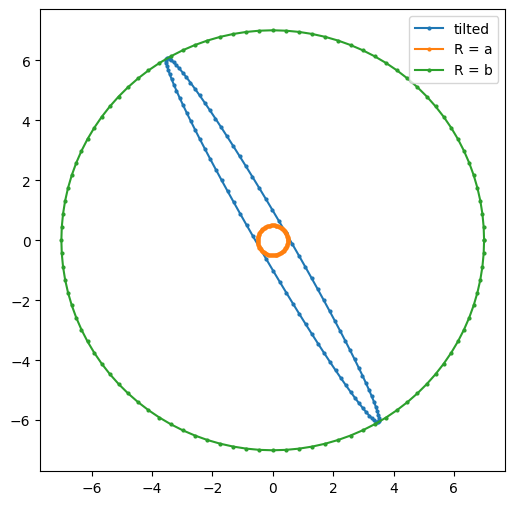

In [45]:
fig, Ax = plt.subplots(1, 1, figsize=(6, 6))

# Tilted Ellipse
X = a*np.cos(Theta)*np.cos(A) - b*np.sin(Theta)*np.sin(A)
Y = b*np.sin(Theta)*np.cos(A) + a*np.cos(Theta)*np.sin(A)

# Circles
Xa = a*np.cos(Theta)
Ya = a*np.sin(Theta)

Xb = b*np.cos(Theta)
Yb = b*np.sin(Theta)

plt.plot(X, Y, "-o", ms = 2, label = "tilted")
plt.plot(Xa, Ya, "-o", ms = 2, label = "R = a")
plt.plot(Xb, Yb, "-o", ms = 2, label = "R = b")
plt.legend()
plt.show()

Normalize Ellipse into a circle:

$\tilde{x} = \frac{x}{\sqrt{\beta}}$\
$\tilde{y} = \frac{x\alpha}{\sqrt{\beta}} + y\sqrt{\beta}$

Relation between Linear optics and ellipse parameters:
https://math.stackexchange.com/q/2989928

$\beta = \frac{\sin^2A}{a^2} + \frac{\cos^2A}{b^2}$\
$2\alpha = \frac{\sin2A}{a^2} - \frac{\sin2A}{b^2}$\
$\epsilon = 1$

Radius of circle depends on $\sqrt{\epsilon}$. Multiply by factor of $\epsilon^2$ to $\beta$ and $\alpha$ to scale

In [46]:
beta = (np.sin(A)/a)**2 + (np.cos(A)/b)**2
alpha = (np.sin(2*A)/a**2 - np.sin(2*A)/b**2)/2

#Scaling:
epsilon = 5**2
beta *= epsilon
alpha *= epsilon
print(epsilon, beta, alpha)

25 25.382653061224485 43.08034534131774


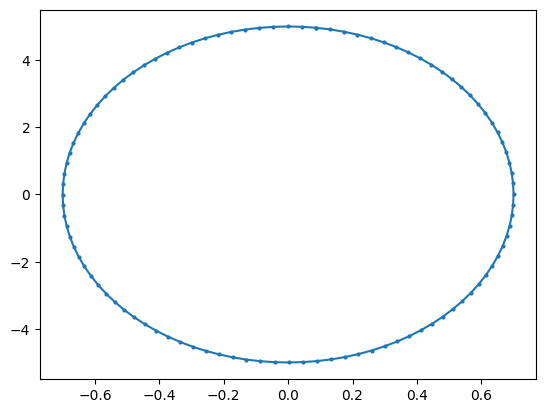

In [47]:
# Renormalize Tilted Ellipse into circle
X_tilde = X/np.sqrt(beta)
Y_tilde = X*alpha/np.sqrt(beta) + Y*np.sqrt(beta)

plt.plot(X_tilde, Y_tilde, "-o", ms = 2)
plt.show()

Find constants from a set of coordinates: at least 3 points to find linear optics:
$c_0 x^2 + 2c_1 x y + c_2 y^2 = 1$

where
$c_0 = \frac{\gamma}{\epsilon}$\
$c_1 = \frac{\alpha}{\epsilon}$\
$c_2 = \frac{\beta}{\epsilon}$

Then multiply $\epsilon$ to get linear optics

In [116]:
X2 = X**2
Y2 = Y**2
XY = X*Y
M = np.vstack([X2, 2*XY, Y2]).T

In [117]:
optics = pinv(M) @ np.ones(101)
print(optics)

[3.00510204 1.72321381 1.01530612]


In [118]:
epsilon*optics

array([75.12755102, 43.08034534, 25.38265306])

Vary a, b, A to see what values beta and alpha can take on

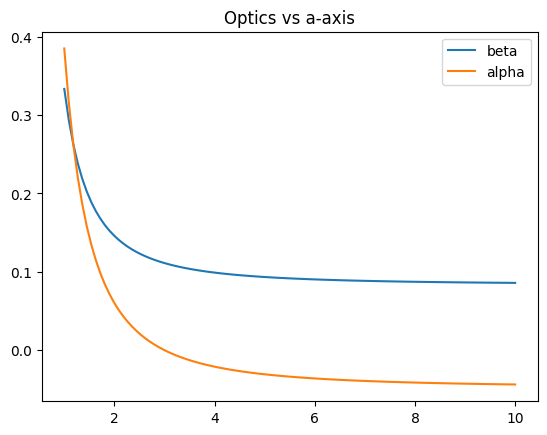

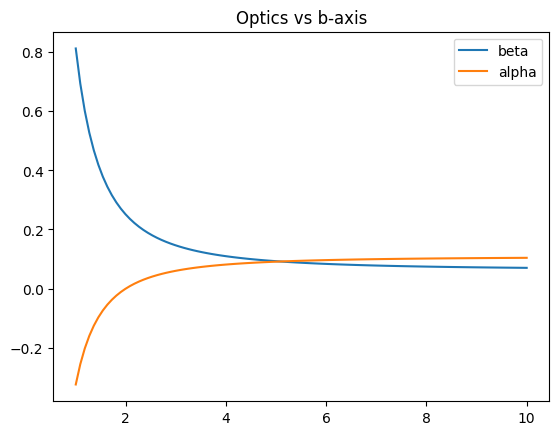

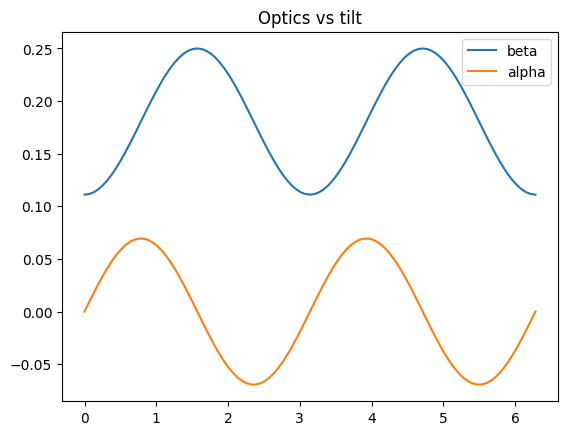

In [134]:
a = 2
b = 3
A = np.pi/6

a_array = np.linspace(1, 10, N + 1)
bet_array = (np.sin(A)/a_array)**2 + (np.cos(A)/b)**2*np.ones(N + 1)
alf_array = (np.sin(2*A)/a_array**2 - np.sin(2*A)/b**2)/2*np.ones(N + 1)
plt.plot(a_array, bet_array, label = "beta")
plt.plot(a_array, alf_array, label = "alpha")
plt.title("Optics vs a-axis")
plt.legend()
plt.show()

b_array = np.linspace(1, 10, N + 1)
bet_array = (np.sin(A)/a)**2*np.ones(N + 1) + (np.cos(A)/b_array)**2
alf_array = (np.sin(2*A)/a**2*np.ones(N + 1) - np.sin(2*A)/b_array**2)/2
plt.plot(b_array, bet_array, label = "beta")
plt.plot(b_array, alf_array, label = "alpha")
plt.title("Optics vs b-axis")
plt.legend()
plt.show()

A_array = np.linspace(0, 2*np.pi, N + 1)
bet_array = (np.sin(A_array)/a)**2 + (np.cos(A_array)/b)**2
alf_array = (np.sin(2*A_array)/a**2 - np.sin(2*A_array)/b**2)/2
plt.plot(A_array, bet_array, label = "beta")
plt.plot(A_array, alf_array, label = "alpha")
plt.title("Optics vs tilt")
plt.legend()
plt.show()